## Training an image classifier
### We will do the following steps in order:

1) Load and normalizing the CIFAR10 training and test datasets using torchvision <br>
2) Define a Convolutional Neural Network <br>
3) Define a loss function <br>
4) Train the network on the training data <br>
5) Test the network on the test data <br>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf
!pip install tensorflow --user
!pip install grpcio==1.24.3
!pip install tensorflow==2.2.0
!conda install -c conda-forge tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 8.2 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.48.1
    Uninstalling grpcio-1.48.1:
      Successfully uninstalled grpcio-1.48.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.2 MB 4.1 kB/s 
     |████████████████████████████████| 2.9 MB 45.9 MB/s 
     |████████████████████████████████| 3.0 MB 45.9 MB/s 
     |████████████████████████████████| 454 kB 47.0 MB/s 
     |████████████████████████████████| 26.1 MB 117.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estima

/bin/bash: conda: command not found


In [2]:
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    self.fc1 = nn.Linear(16 * 6 * 6, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features
  
net = Net()
print(net)

params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
10
torch.Size([6, 1, 3, 3])


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


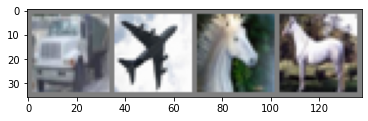

truck plane horse horse


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.238
[1,  4000] loss: 1.826
[1,  6000] loss: 1.650
[1,  8000] loss: 1.576
[1, 10000] loss: 1.505
[1, 12000] loss: 1.450
[2,  2000] loss: 1.401
[2,  4000] loss: 1.389
[2,  6000] loss: 1.349
[2,  8000] loss: 1.333
[2, 10000] loss: 1.308
[2, 12000] loss: 1.269
Finished Training


In [8]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [9]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.243
[1,  4000] loss: 1.222
[1,  6000] loss: 1.216
[1,  8000] loss: 1.216
[1, 10000] loss: 1.184
[1, 12000] loss: 1.205
[2,  2000] loss: 1.123
[2,  4000] loss: 1.153
[2,  6000] loss: 1.137
[2,  8000] loss: 1.128
[2, 10000] loss: 1.127
[2, 12000] loss: 1.130
Finished Training


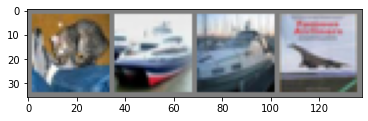

GroundTruth:    cat  ship  ship plane


In [10]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [12]:
outputs = net(images)

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 61 %
Accuracy of  bird : 49 %
Accuracy of   cat : 27 %
Accuracy of  deer : 44 %
Accuracy of   dog : 57 %
Accuracy of  frog : 70 %
Accuracy of horse : 55 %
Accuracy of  ship : 64 %
Accuracy of truck : 51 %


In [16]:
#Writing model inside a function

def build_model(hp):
  model=Sequential()

  #first hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024, step=16),activation=hp.Choice('activation',['relu','tanh']),input_shape=[9]))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1, max_value=0.4, step=0.1)))

  #second hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024, step=16),activation=hp.Choice('activation',['relu','tanh'])))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1, max_value=0.4, step=0.1)))

  #third hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024, step=16),activation=hp.Choice('activation',['relu','tanh'])))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1, max_value=0.4, step=0.1)))
  #output layer
  model.add(Dense(1,activation='sigmoid'))

  #Compile the model 
  model.compile(loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.Adam (learning_rate=0.01),metrics=['accuracy'])

  learning_rate=hp.Float('learning_rate',min_value=0.001, max_value=0.1, step=0.1)

  #Compile the model 
  model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

  return model

In [17]:
#The shape of the input is 9 columns, the NN will receive 9 inputs
model=Sequential()
model.add(Dense(19,activation='relu',input_shape=[9]))
model.add(Dropout(0.3))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(1,activation='sigmoid'))